<a href="https://colab.research.google.com/github/nrjcs/iitpbse/blob/master/LSTM_on_Time_Series_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://keras.io/api/
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from numpy import array

import pandas as pd
# https://pandas.pydata.org/docs/

import numpy as np
# https://numpy.org/doc/stable/about.html

from math import sqrt
# https://docs.python.org/3/library/math.html
from datetime import datetime
# https://docs.python.org/3/library/datetime.html

from matplotlib import pyplot as plt
# https://matplotlib.org/index.html
import seaborn as sns
# https://seaborn.pydata.org/

from sklearn.metrics import mean_squared_error
# https://scikit-learn.org/stable/getting_started.html




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/AirPassengers.csv')


In [ ]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
data.dtypes

Month          object
#Passengers     int64
dtype: object

In [ ]:
data['Month'] = pd.DatetimeIndex(data['Month'])
data.dtypes

Month          datetime64[ns]
#Passengers             int64
dtype: object

# Vanila LSTM

In [ ]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [ ]:
# Example to understand how the split seq works
seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
n_steps = 3
X, y = split_sequence(seq, n_steps)

# summarize the data
for i in range(len(X)):
	print(X[i], y[i])

[10 20 30] 40
[20 30 40] 50
[30 40 50] 60
[40 50 60] 70
[50 60 70] 80
[60 70 80] 90


In [ ]:
raw_seq = data['#Passengers']
trainLen = 111
train = raw_seq[:trainLen]
test = raw_seq[trainLen:]

In [ ]:
trainLen

111

In [ ]:
# choose a number of time steps
n_steps = 3

In [ ]:
# split into samples
X, y = split_sequence(train, n_steps)

In [ ]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [ ]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
# fit model
history = model.fit(X, y, epochs=200, verbose=0)

dict_keys(['loss'])


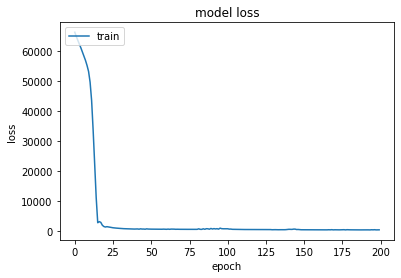

In [ ]:
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
test = test.reset_index(drop = True)

In [ ]:
# demonstrate prediction
X_test, y_test = split_sequence(test, n_steps)
X_test = np.array(X_test).reshape((-1, n_steps, n_features))
yhat = model.predict(X_test, verbose=0)

In [ ]:
error = sqrt(mean_squared_error(y_test, yhat))
print('Test RMSE: %.3f' % error)

Test RMSE: 42.400


# Stacked LSTM

Stacked LSTMs or Deep LSTMs were introduced by Graves, et al. in their application of LSTMs to speech recognition, beating a benchmark on a challenging standard problem.

## Architecture of stacked LSTM

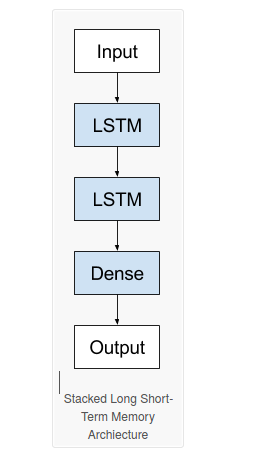

In [ ]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
# fit model
history= model.fit(X, y, epochs=200, verbose=0)

dict_keys(['loss'])


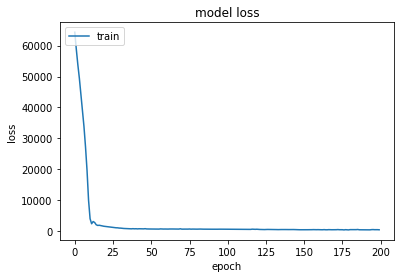

In [ ]:
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# demonstrate prediction
X_test, y_test = split_sequence(test, n_steps)
X_test = np.array(X_test).reshape((-1, n_steps, n_features))
yhat = model.predict(X_test, verbose=0)

In [ ]:
error = sqrt(mean_squared_error(y_test, yhat))
print('Test RMSE: %.3f' % error)

Test RMSE: 46.495



# Bidirectional LSTM

On some sequence prediction problems, it can be beneficial to allow the LSTM model to learn the input sequence both forward and backwards and concatenate both interpretations.

This is called a Bidirectional LSTM.

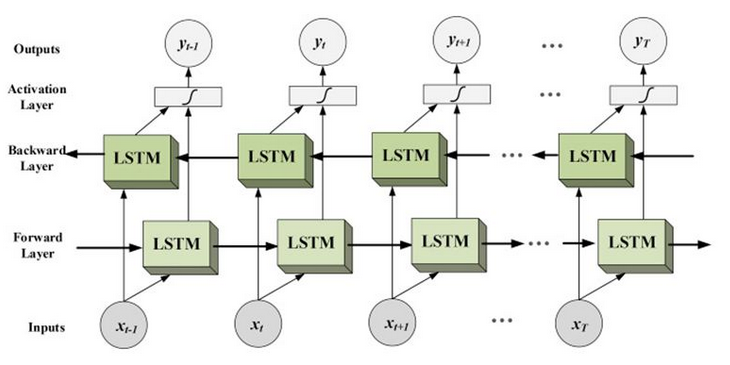

In [ ]:
from keras.layers import Bidirectional

In [ ]:
# define model
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
# fit model
history = model.fit(X, y, epochs=200, verbose=0)

dict_keys(['loss'])


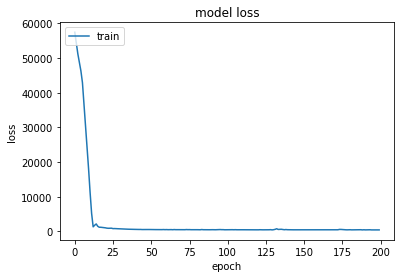

In [ ]:
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# demonstrate prediction
X_test, y_test = split_sequence(test, n_steps)
X_test = np.array(X_test).reshape((-1, n_steps, n_features))
yhat = model.predict(X_test, verbose=0)

In [ ]:
error = sqrt(mean_squared_error(y_test, yhat))
print('Test RMSE: %.3f' % error)

Test RMSE: 42.350
